In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

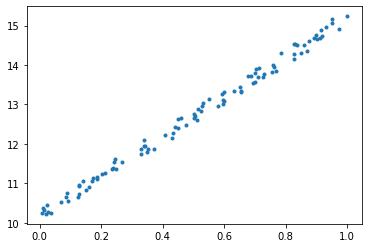

In [2]:
N = 100
X = np.random.rand(N)
Y = 5 * X + 10 + 0.4 * np.random.rand(N)
plt.plot(X, Y, '.')
plt.show()

In [3]:
w = np.random.rand()
b = np.random.rand()

w = tf.Variable(w)
b = tf.Variable(b)
lr = 0.1

for epoch in range(1000):
  with tf.GradientTape() as t:
    y = w * X + b
    loss = tf.reduce_mean((y - Y)**2)
  dW, db = t.gradient(loss, [w, b]) # de/dW, de/db
  w.assign_sub(lr * dW) # w -= lr * dW
  b.assign_sub(lr * db) # b -= lr * db
  print(epoch, w.numpy(), b.numpy(), loss.numpy())

0 1.9965943 3.0764003 134.76071
1 2.9083817 4.801038 75.13505
2 3.5870814 6.089717 41.899715
3 4.091788 7.0529 23.37419
4 4.46662 7.7730575 13.047822
5 4.744516 8.311761 7.2916126
6 4.9500666 8.714979 4.0827904
7 5.1016307 9.017032 2.2938735
8 5.212915 9.243542 1.2964123
9 5.2941513 9.41364 0.74011046
10 5.352979 9.541608 0.4297164
11 5.3951015 9.638109 0.2563988
12 5.424776 9.711104 0.15949436
13 5.445181 9.766538 0.105190486
14 5.4586883 9.808847 0.07463942
15 5.467069 9.841347 0.057335366
16 5.471646 9.866509 0.04742248
17 5.4734044 9.886183 0.041636538
18 5.4730816 9.901746 0.03815782
19 5.471226 9.914228 0.035971936
20 5.468249 9.924399 0.034513205
21 5.4644547 9.932834 0.03346619
22 5.460072 9.9399605 0.032654833
23 5.455271 9.946099 0.031980917
24 5.450177 9.951489 0.03138948
25 5.4448857 9.95631 0.030849814
26 5.4394665 9.960695 0.030344535
27 5.4339714 9.964745 0.029863892
28 5.428439 9.968533 0.029402222
29 5.422898 9.972115 0.028956335
30 5.4173694 9.9755335 0.02852423
31 5.

In [4]:
from tensorflow import keras
from tensorflow.keras import layers

In [5]:
inputs = keras.Input(shape=(1,))
dense = layers.Dense(1)
outputs = dense(inputs)
model = keras.Model(inputs, outputs)
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.1), loss=keras.losses.MeanSquaredError())

In [6]:
model.fit(X, Y, batch_size=N, epochs=1000)

Epoch 1/1000
1/1 [==============================] - 0s 153ms/step - loss: 168.7015
Epoch 2/1000
1/1 [==============================] - 0s 663us/step - loss: 94.0388
Epoch 3/1000
1/1 [==============================] - 0s 636us/step - loss: 52.4224
Epoch 4/1000
1/1 [==============================] - 0s 1ms/step - loss: 29.2256
Epoch 5/1000
1/1 [==============================] - 0s 839us/step - loss: 16.2959
Epoch 6/1000
1/1 [==============================] - 0s 773us/step - loss: 9.0890
Epoch 7/1000
1/1 [==============================] - 0s 777us/step - loss: 5.0719
Epoch 8/1000
1/1 [==============================] - 0s 800us/step - loss: 2.8328
Epoch 9/1000
1/1 [==============================] - 0s 778us/step - loss: 1.5847
Epoch 10/1000
1/1 [==============================] - 0s 737us/step - loss: 0.8891
Epoch 11/1000
1/1 [==============================] - 0s 811us/step - loss: 0.5013
Epoch 12/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.2852
Epoch 13/1000
1/1 [====

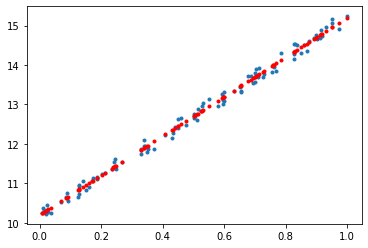

In [7]:
Z = model.predict(X)
plt.plot(X, Y, '.')
plt.plot(X, Z, '.r')
plt.show()